In [1]:
%pylab inline
from astropy import cosmology
from astropy import units as u
from scipy import integrate
from math import *

Populating the interactive namespace from numpy and matplotlib


# 1

In [2]:
Ho = 100*u.km/u.s / u.Mpc
c = 3E5 * u.km/u.s

In [3]:
def hubble_constant(z, O_m, O_l):
    O_r = 1 - O_m - O_l
    H_z = Ho*np.sqrt(O_m*(1+z)**3.0 + O_r*(1+z)**2.0 + O_l)
    return H_z.value
    

In [4]:
def comov_distance_help(z, O_m, O_l):
    H_z = hubble_constant(z, O_m, O_l)
    Dc_int = c/H_z
    return Dc_int.value

def comov_distance(z_i, z_f, O_m, O_l):
    if len(z_f)>1:
        r_l = np.zeros(len(z))
        for i in range(len(z_f)):
            r_l[i] = integrate.quad(comov_distance_help, z_i, z_f[i], args=(O_m, O_l))[0]
    else:
        r_l = integrate.quad(comov_distance_help, z_i, z_f, args=(O_m, O_l))[0]
    return r_l
    
def transvers_com(z_i, z_f, O_m, O_l):
    
    O_r = 1 - O_m - O_l
    Dh = (c/Ho).value
    Dc = comov_distance(z_i, z_f, O_m, O_l)
    
    if O_r > 0:
        Dm = Dh * 1/np.sqrt(O_r)*np.sinh(np.sqrt(O_r)*Dc/Dh)
    elif O_r == 0:
        Dm = Dc
    elif O_r < 0:
        Dm = Dh * 1/np.sqrt(O_r)*np.sin(np.sqrt(O_r)*Dc/Dh)
    return Dm

def ang_diam_dist(z_i, z_f, O_m, O_l):
    Dm = transvers_com(z_i, z_f, O_m, O_l)
    Da = Dm/(1+z_f)
    return Da

def lum_dinstance(z_i, z_f, O_m, O_l):
    Dl = transvers_com(z_i, z_f, O_m, O_l)
    return Dl*(1+z_f)

def distance_modulus(z_i, z_f, O_m, O_l):
    Dl = lum_dinstance(z_i, z_f, O_m, O_l)
    return 5*np.log10(Dl*1E6/10.0)

def dcom_volume(z_i, z_f, O_m, O_l):
    Dh = c/Ho
    Da = ang_diam_dist(z_i, z_f, O_m, O_l)
    Hz = hubble_constant(z_f, O_m, O_l)
    dVc = Dh * (1+z)**2.0*Da**2.0/(Hz*Ho)
    return dVc

def lookback_time_help(z, O_m, O_l):
    Hz = hubble_constant(z, O_m, O_l)
    return 1/((1+z)*Hz/Ho.value) / Ho.to(1/u.Gyr).value

def lookback_time(z_i, z_f, O_m, O_l):
    if len(z_f)>1:
        t = np.zeros(len(z))
        for i in range(len(z_f)):
            t[i] = integrate.quad(lookback_time_help, z_i, z_f[i], args=(O_m, O_l))[0]
    else:
        t = integrate.quad(lookback_time_help, z_i, z_f, args=(O_m, O_l)) [0]
    return t
    

    

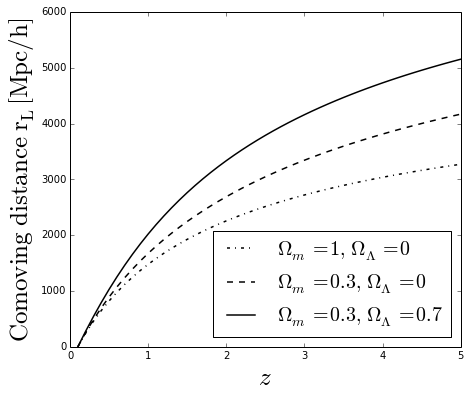

In [5]:
z = np.linspace(0.1, 5)

rl1 = comov_distance(0.1, z, 1, 0)
rl2 = comov_distance(0.1, z, 0.3, 0.0)
rl3 = comov_distance(0.1, z, 0.3, 0.7)

figure(figsize=(7,6))
plot(z, rl1, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(1, 0), lw=1.5, ls='-.', c='k')
plot(z, rl2, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(0.3, 0), lw=1.5, ls='--', c='k')
plot(z, rl3, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(0.3, 0.7), lw=1.5, c='k')
legend(loc='best', fontsize=20)
xlabel('$z$', fontsize=25)
ylabel('$\mathrm{Comoving\ distance\ r_L [Mpc/h]}$', fontsize=25)
savefig('comoving_dist.pdf', bbox_inches='tight', dpi=300)



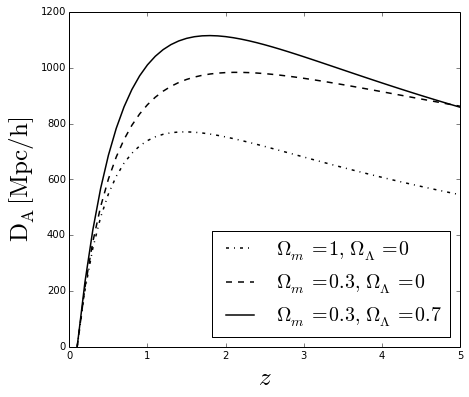

In [6]:
D1 = ang_diam_dist(0.1, z, 1, 0)
D2 = ang_diam_dist(0.1, z, 0.3, 0)
D3 = ang_diam_dist(0.1, z, 0.3, 0.7)

figure(figsize=(7,6))
plot(z, D1, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(1, 0), lw=1.5, ls='-.', c='k')
plot(z, D2, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(0.3, 0), lw=1.5, ls='--', c='k')
plot(z, D3, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(0.3, 0.7), lw=1.5, c='k')
legend(loc='best', fontsize=20)
xlabel('$z$', fontsize=25)
ylabel('$\mathrm{D_A [Mpc/h]}$', fontsize=25)
savefig('da.pdf', bbox_inches='tight', dpi=300)

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:40: RuntimeWarning: divide by zero encountered in log10


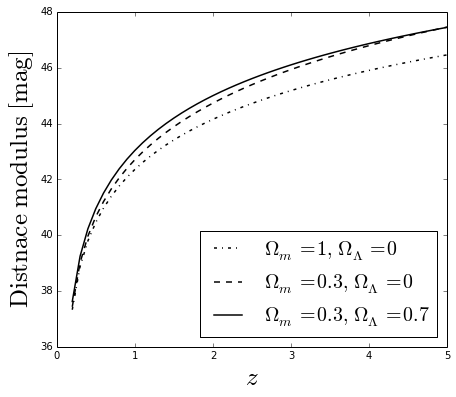

In [7]:
Dmod1 = distance_modulus(0.1, z, 1, 0)
Dmod2 = distance_modulus(0.1, z, 0.3, 0)
Dmod3 = distance_modulus(0.1, z, 0.3, 0.7)

figure(figsize=(7,6))
plot(z, Dmod1, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(1, 0), lw=1.5, ls='-.', c='k')
plot(z, Dmod2, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(0.3, 0), lw=1.5, ls='--', c='k')
plot(z, Dmod3, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(0.3, 0.7), lw=1.5, ls='-', c='k')
legend(loc='best', fontsize=20)
xlabel('$z$', fontsize=25)
ylabel('$\mathrm{Distnace\ modulus\ [mag]}$', fontsize=25)
savefig('DM.pdf', bbox_inches='tight', dpi=300)


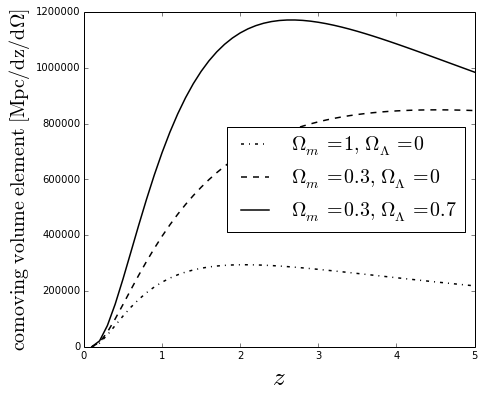

In [8]:
dVc1 = dcom_volume(0.1, z, 1, 0)
dVc2 = dcom_volume(0.1, z, 0.3, 0)
dVc3 = dcom_volume(0.1, z, 0.3, 0.7)

figure(figsize=(7,6))
plot(z, dVc1, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(1, 0), lw=1.5, ls='-.', c='k')
plot(z, dVc2, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(0.3, 0), lw=1.5, ls='--', c='k')
plot(z, dVc3, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(0.3, 0.7), lw=1.5, ls='-', c='k')
legend(loc='best', fontsize=20)
xlabel('$z$', fontsize=25)
ylabel('$\mathrm{comoving\ volume\ element\ [Mpc/dz/d\Omega]}$', fontsize=20)
savefig('dVc.pdf', bbox_inches='tight', dpi=300)


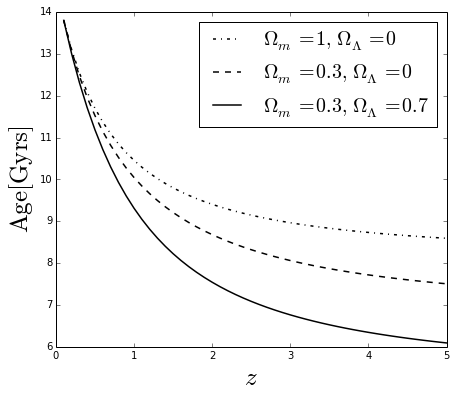

In [9]:
t1 = lookback_time(0.1, z, 1, 0)
t2 = lookback_time(0.1, z, 0.3, 0)
t3 = lookback_time(0.1, z, 0.3, 0.7)

figure(figsize=(7,6))
plot(z, 13.8-t1, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(1, 0), lw=1.5, ls='-.', c='k')
plot(z, 13.8-t2, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(0.3, 0), lw=1.5, ls='--', c='k')
plot(z, 13.8-t3, label='$\Omega_m = {},\ \Omega_\Lambda = {} $'.format(0.3, 0.7), lw=1.5, ls='-', c='k')
legend(loc='best', fontsize=20)
xlabel('$z$', fontsize=25)
ylabel('$\mathrm{Age [Gyrs]}$', fontsize=25)
savefig('age.pdf', bbox_inches='tight', dpi=300)


In [278]:
#2

658*2.75

1809.5

In [279]:
10 - 5*log10(10E6/10)

-20.0